In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
pricing = pd.read_csv("housing.csv")
pricing.head()


Saving housing.csv to housing (1).csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
import numpy as np
import matplotlib.pyplot as plt
pricing.shape

(20640, 10)

In [4]:
pricing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

X = pricing.drop('median_house_value', axis=1)
X = X.select_dtypes(include=['number'])
y = pricing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an imputer to fill missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted_prices = model.predict(X_test)
print(predicted_prices)

[162261.28820928 292401.76617235 250389.69519058 ... 280983.47183364
  98890.08944372 301614.57152661]


In [11]:
def detect_outliers(pricing, column):
  A = pricing[column].quantile(0.25)
  B = pricing[column].quantile(0.75)
  C =   B-A
  lower = A - 1.5*C
  upper = B + 1.5*C
  outliers = pricing[(pricing[column]<lower) | (pricing[column]>upper)]
  return outliers

outliers = detect_outliers(pricing,'median_house_value')
print(f"no. of outliers in price: {outliers.shape[1]}")


no. of outliers in price: 10


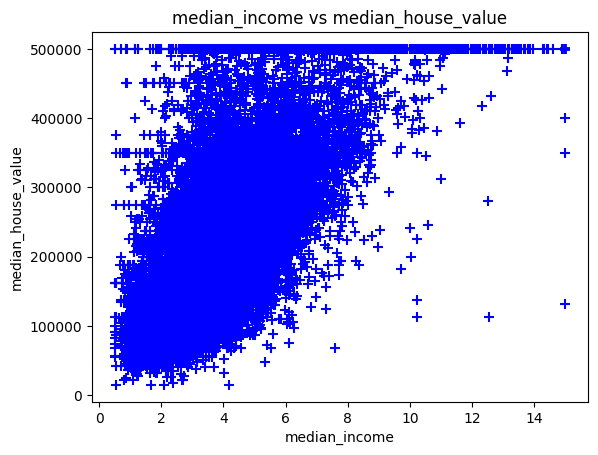

In [18]:
%matplotlib inline
plt.scatter(pricing.median_income, pricing.median_house_value, color = 'b', marker='+',s=50)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title("median_income vs median_house_value")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  4695131141.40766


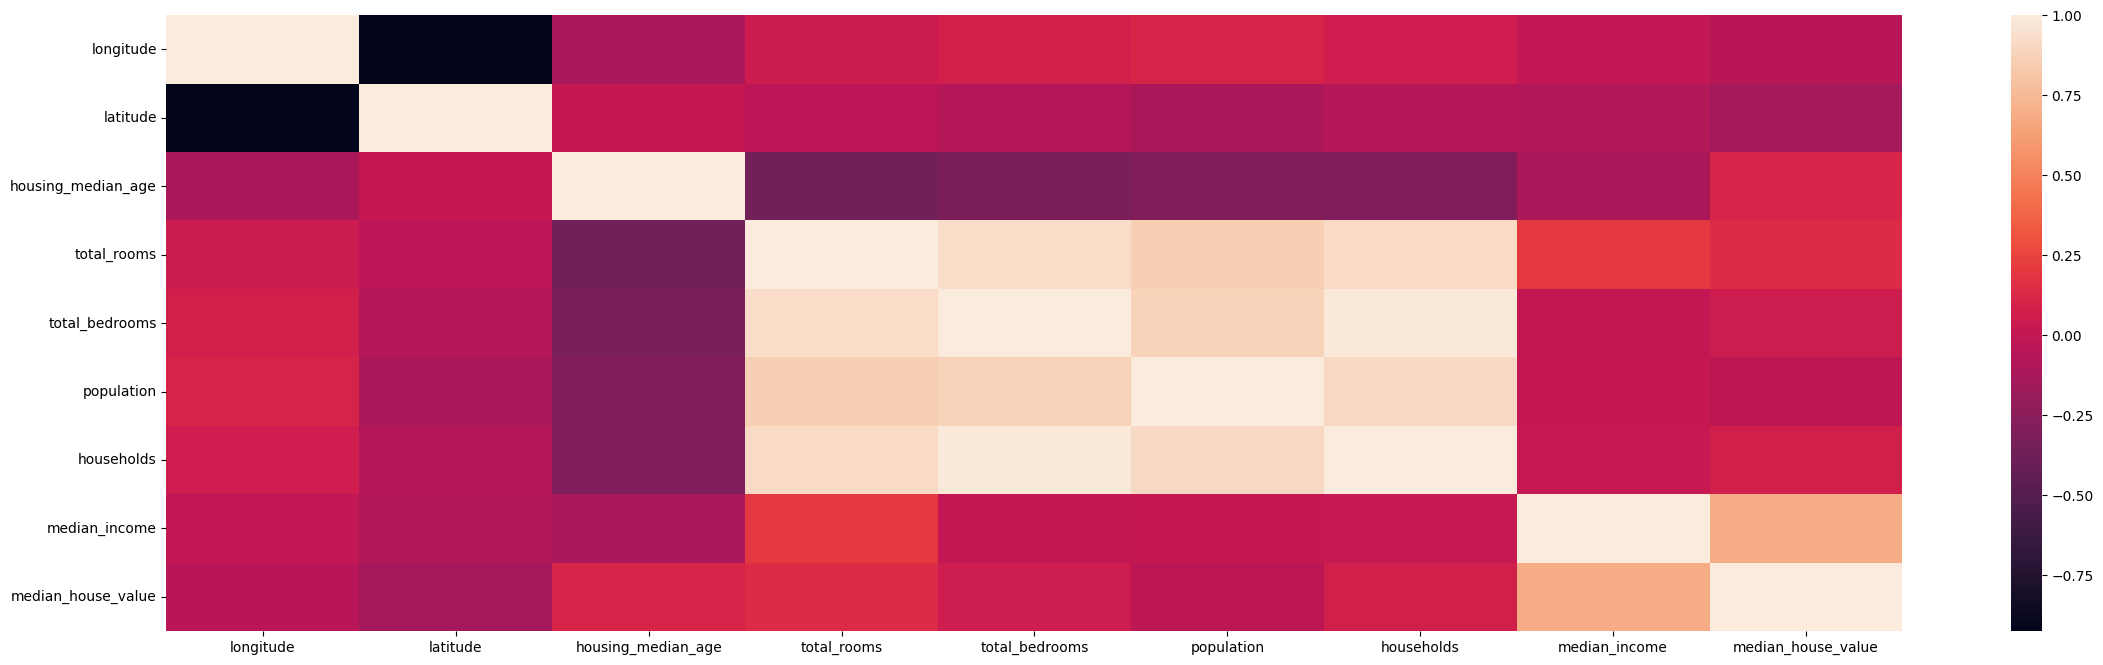

In [21]:
import seaborn as sns
train_pricing, test_pricing = train_test_split(pricing, test_size=0.2)
plt.figure(figsize=(28,8))
sns.heatmap(train_pricing.corr(numeric_only=True))
plt.show()

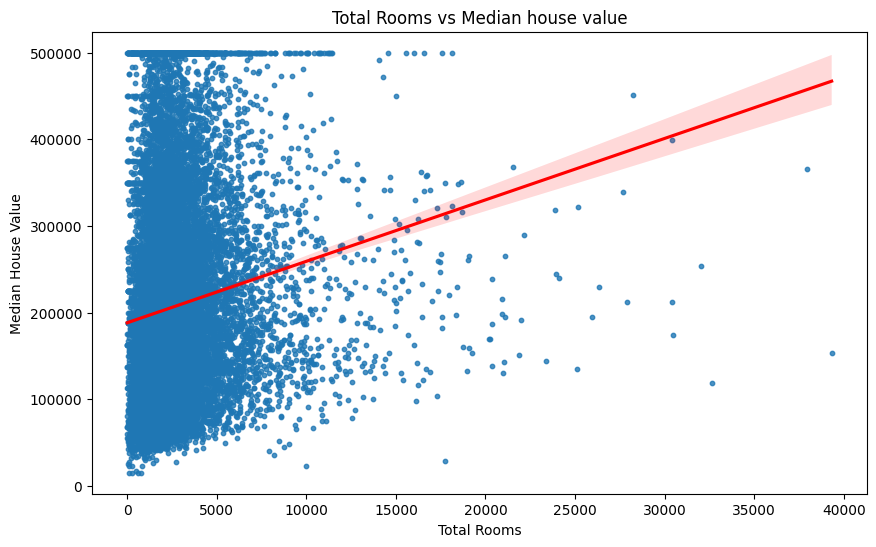

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='total_rooms', y='median_house_value', data=pricing, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Total Rooms vs Median house value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

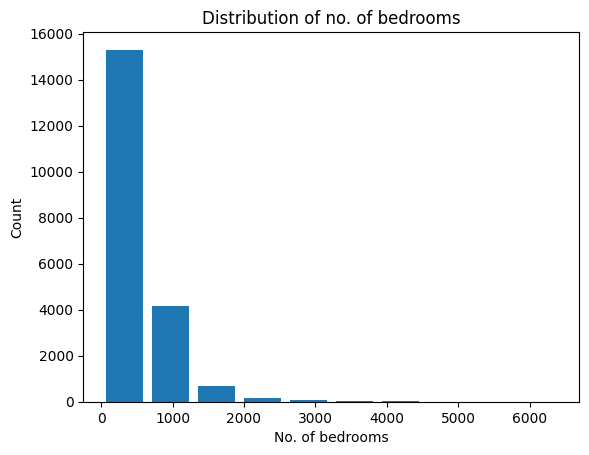

In [28]:
plt.hist(pricing.total_bedrooms,rwidth=0.8)
plt.xlabel('No. of bedrooms')
plt.ylabel('Count')
plt.title('Distribution of no. of bedrooms')
plt.show()